In [26]:
import pandas as pd


csv_file = "deberta-v3-large-on-raw_questions_wiki_sci_1-eval-kaggle-all-folds-grad-accum-16-deberta-v3-large-2023-08-24-14-33-06-checkpoint-3592.csv"

df = pd.read_csv(csv_file)

df

,id,score0,score1,score2,score3,score4,prediction
0,0,0.538160,0.066540,-0.402647,-0.646668,-0.354475,D C E
1,1,-0.353249,-0.085705,0.380097,0.034227,0.849838,A B D
2,2,-0.467818,-0.165642,-0.516248,-0.446694,-0.536341,E C A
3,3,0.373953,0.593558,0.058542,0.505035,0.499360,C A E
4,4,-0.300735,0.688780,0.135007,-0.330300,0.554812,D A C
...,...,...,...,...,...,...,...
195,195,0.325095,0.485244,-0.360784,0.593209,0.420464,C A E
196,196,0.053830,-0.390423,-0.365858,0.390205,0.747368,B C A
197,197,-0.480969,-0.482602,-0.432610,-0.425749,-0.409085,B A C
198,198,-0.602239,-0.412736,-0.440742,-0.479174,-0.207595,A D C


In [27]:
df_gt = pd.read_csv("../../data/kaggle-llm-science-exam/train.csv")
df_gt

,id,prompt,A,B,C,D,E,answer
0,0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D
1,1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A
2,2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A
3,3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C
4,4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D
...,...,...,...,...,...,...,...,...
195,195,What is the relation between the three moment ...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,The three moment theorem describes the relatio...,The three moment theorem is used to calculate ...,The three moment theorem is used to derive the...,C
196,196,"What is the throttling process, and why is it ...",The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,The throttling process is a steady adiabatic f...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,B
197,197,What happens to excess base metal as a solutio...,"The excess base metal will often solidify, bec...",The excess base metal will often crystallize-o...,"The excess base metal will often dissolve, bec...","The excess base metal will often liquefy, beco...","The excess base metal will often evaporate, be...",B
198,198,"What is the relationship between mass, force, ...",Mass is a property that determines the weight ...,Mass is an inertial property that determines a...,Mass is an inertial property that determines a...,Mass is an inertial property that determines a...,Mass is a property that determines the size of...,D


In [28]:
# join df and df_gt on id
df = df.merge(df_gt, on="id")
df

,id,score0,score1,score2,score3,score4,prediction,prompt,A,B,C,D,E,answer
0,0,0.538160,0.066540,-0.402647,-0.646668,-0.354475,D C E,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D
1,1,-0.353249,-0.085705,0.380097,0.034227,0.849838,A B D,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A
2,2,-0.467818,-0.165642,-0.516248,-0.446694,-0.536341,E C A,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A
3,3,0.373953,0.593558,0.058542,0.505035,0.499360,C A E,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C
4,4,-0.300735,0.688780,0.135007,-0.330300,0.554812,D A C,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0.325095,0.485244,-0.360784,0.593209,0.420464,C A E,What is the relation between the three moment ...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,The three moment theorem describes the relatio...,The three moment theorem is used to calculate ...,The three moment theorem is used to derive the...,C
196,196,0.053830,-0.390423,-0.365858,0.390205,0.747368,B C A,"What is the throttling process, and why is it ...",The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,The throttling process is a steady adiabatic f...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,B
197,197,-0.480969,-0.482602,-0.432610,-0.425749,-0.409085,B A C,What happens to excess base metal as a solutio...,"The excess base metal will often solidify, bec...",The excess base metal will often crystallize-o...,"The excess base metal will often dissolve, bec...","The excess base metal will often liquefy, beco...","The excess base metal will often evaporate, be...",B
198,198,-0.602239,-0.412736,-0.440742,-0.479174,-0.207595,A D C,"What is the relationship between mass, force, ...",Mass is a property that determines the weight ...,Mass is an inertial property that determines a...,Mass is an inertial property that determines a...,Mass is an inertial property that determines a...,Mass is a property that determines the size of...,D


In [29]:
import numpy as np

# apply softmax to scores
def softmax(x):
    elements = x.tolist()
    elements = [np.exp(element) for element in elements]
    elements = [element / sum(elements) for element in elements]    
    return elements
    

df['softmaxes'] = df[['score0', 'score1', 'score2', 'score3', 'score4']].apply(lambda x: softmax(x), axis=1)
for i in range(5):
    df[f'prob{i}'] = df['softmaxes'].apply(lambda x: x[i])

df

,id,score0,score1,score2,score3,score4,prediction,prompt,A,B,C,D,E,answer,softmaxes,prob0,prob1,prob2,prob3,prob4
0,0,0.538160,0.066540,-0.402647,-0.646668,-0.354475,D C E,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,"[0.3663436568210659, 0.22859502676119797, 0.14...",0.366344,0.228595,0.142989,0.112027,0.150045
1,1,-0.353249,-0.085705,0.380097,0.034227,0.849838,A B D,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,"[0.10878524910692082, 0.14215519767784524, 0.2...",0.108785,0.142155,0.226495,0.160269,0.362296
2,2,-0.467818,-0.165642,-0.516248,-0.446694,-0.536341,E C A,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,"[0.1900908891012235, 0.257154584832709, 0.1811...",0.190091,0.257155,0.181104,0.194149,0.177501
3,3,0.373953,0.593558,0.058542,0.505035,0.499360,C A E,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,"[0.19052170210154756, 0.23731092232303908, 0.1...",0.190522,0.237311,0.138984,0.217206,0.215977
4,4,-0.300735,0.688780,0.135007,-0.330300,0.554812,D A C,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,"[0.11682836917976423, 0.31425988025218143, 0.1...",0.116828,0.314260,0.180629,0.113425,0.274857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0.325095,0.485244,-0.360784,0.593209,0.420464,C A E,What is the relation between the three moment ...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,The three moment theorem describes the relatio...,The three moment theorem is used to calculate ...,The three moment theorem is used to derive the...,C,"[0.1966609748442471, 0.230818033502915, 0.0990...",0.196661,0.230818,0.099048,0.257133,0.216340
196,196,0.053830,-0.390423,-0.365858,0.390205,0.747368,B C A,"What is the throttling process, and why is it ...",The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,The throttling process is a steady adiabatic f...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,B,"[0.17546314101028895, 0.11252509608915176, 0.1...",0.175463,0.112525,0.115323,0.245625,0.351064
197,197,-0.480969,-0.482602,-0.432610,-0.425749,-0.409085,B A C,What happens to excess base metal as a solutio...,"The excess base metal will often solidify, bec...",The excess base metal will often crystallize-o...,"The excess base metal will often dissolve, bec...","The excess base metal will often liquefy, beco...","The excess base metal will often evaporate, be...",B,"[0.19307935300529436, 0.19276416714987382, 0.2...",0.193079,0.192764,0.202646,0.204041,0.207470
198,198,-0.602239,-0.412736,-0.440742,-0.479174,-0.207595,A D C,"What is the relationship between mass, force, ...",Mass is a pr

In [43]:
df['prediction_max'] = df['prediction'].apply(lambda x: x[0])


In [44]:
df['max_prob'] = df[['prob0', 'prob1', 'prob2', 'prob3', 'prob4']].apply(lambda x: max(x), axis=1)
df

,id,score0,score1,score2,score3,score4,prediction,prompt,A,B,...,prob0,prob1,prob2,prob3,prob4,max_prob,answer_not_in_prediction,got_correct_answer,answered_3,prediction_max
0,0,0.538160,0.066540,-0.402647,-0.646668,-0.354475,D C E,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,...,0.366344,0.228595,0.142989,0.112027,0.150045,0.366344,False,True,False,D
1,1,-0.353249,-0.085705,0.380097,0.034227,0.849838,A B D,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,...,0.108785,0.142155,0.226495,0.160269,0.362296,0.362296,False,True,False,A
2,2,-0.467818,-0.165642,-0.516248,-0.446694,-0.536341,E C A,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,...,0.190091,0.257155,0.181104,0.194149,0.177501,0.257155,False,False,False,E
3,3,0.373953,0.593558,0.058542,0.505035,0.499360,C A E,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,...,0.190522,0.237311,0.138984,0.217206,0.215977,0.237311,False,True,False,C
4,4,-0.300735,0.688780,0.135007,-0.330300,0.554812,D A C,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,...,0.116828,0.314260,0.180629,0.113425,0.274857,0.314260,False,True,False,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0.325095,0.485244,-0.360784,0.593209,0.420464,C A E,What is the relation between the three moment ...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,...,0.196661,0.230818,0.099048,0.257133,0.216340,0.257133,False,True,False,C
196,196,0.053830,-0.390423,-0.365858,0.390205,0.747368,B C A,"What is the throttling process, and why is it ...",The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,...,0.175463,0.112525,0.115323,0.245625,0.351064,0.351064,False,True,False,B
197,197,-0.480969,-0.482602,-0.432610,-0.425749,-0.409085,B A C,What happens to excess base metal as a solutio...,"The excess base metal will often solidify, bec...",The excess base metal will often crystallize-o...,...,0.193079,0.192764,0.202646,0.204041,0.207470,0.207470,False,True,False,B
198,198,-0.602239,-0.412736,-0.440742,-0.479174,-0.207595,A D C,"What is the relationship between mass, force, ...",Mass is a property that determines the weight ...,Mass is an inertial property that determines a...,...,0.166702,0.201484,0.195920,0.188533,0.247362,0.247362,False,False,True,A


# Get most wrong answers

In [45]:
df['answer_not_in_prediction'] = df.apply(lambda row: row['answer'] not in row['prediction'], axis=1)
# print rows where answer is not in prediction
df[df['answer_not_in_prediction'] == True]

,id,score0,score1,score2,score3,score4,prediction,prompt,A,B,...,prob0,prob1,prob2,prob3,prob4,max_prob,answer_not_in_prediction,got_correct_answer,answered_3,prediction_max
13,13,0.087602,0.284360,0.525886,0.321666,-0.729000,E A B,What is the Roche limit?,The Roche limit is the distance at which tidal...,The Roche limit is the distance at which tidal...,...,0.182710,0.222440,0.283209,0.230896,0.080745,0.283209,True,False,False,E
34,34,-0.379133,-0.461186,-0.198013,-0.694072,-0.350173,D B A,What is the Penrose process?,The Penrose process is a mechanism through whi...,The Penrose process is a mechanism through whi...,...,0.204960,0.188814,0.245657,0.149587,0.210982,0.245657,True,False,False,D
59,59,-0.432282,-0.395783,-0.457356,-0.476717,-0.469099,D E C,What are the Navier-Stokes equations?,The Navier-Stokes equations are partial differ...,The Navier-Stokes equations are partial differ...,...,0.202724,0.210261,0.197705,0.193914,0.195397,0.210261,True,False,False,D
65,65,-0.025399,0.313277,-0.099536,0.453913,0.827809,C A B,What is the relevant type of coherence for the...,Visibility,Coherence time,...,0.137103,0.192368,0.127307,0.221417,0.321804,0.321804,True,False,False,C
133,133,-0.449441,-0.449441,-0.507735,-0.471391,-0.340589,C D A,What is the Erlangen program?,The Erlangen program is a method of characteri...,The Erlangen program is a method of characteri...,...,0.198544,0.198544,0.187301,0.194234,0.221376,0.221376,True,False,False,C
173,173,0.437628,-0.010092,0.729124,-0.520090,0.079155,D B E,What is the purpose of measuring the Larmor pr...,To measure the magnetization in the same direc...,To create a T1-weighted image that is useful f...,...,0.246304,0.157409,0.329660,0.094524,0.172103,0.329660,True,False,False,D


In [46]:
df[df['answer_not_in_prediction'] == True][['prompt', 'A', 'B', 'C', 'D', 'E', 'answer', 'prediction_max']].values.tolist()

[['What is the Roche limit?',
  'The Roche limit is the distance at which tidal effects would cause an object to rotate since the forces exerted by two massive bodies produce a torque on a third object.',
  'The Roche limit is the distance at which tidal effects would cause an object to unite since differential force from a planet results in parts becoming attracted to one another.',
  "The Roche limit is the distance at which tidal effects would cause a planet to disintegrate since differential force from an object overcomes the planet's core.",
  'The Roche limit is the distance at which tidal effects would cause an object to disintegrate since differential force from a planet overcomes the attraction of the parts between them.',
  "The Roche limit is the distance at which tidal effects would cause an object to break apart due to differential force from the planet overcoming the attraction of the parts of the object for one another, which depends on the object's density and compositi

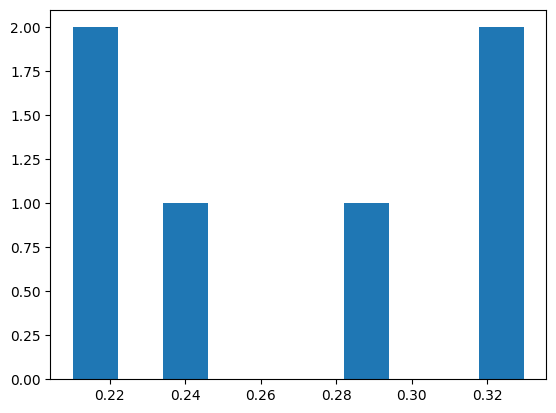

In [37]:
import matplotlib.pyplot as plt

plt.hist(df[df['answer_not_in_prediction'] == True]['max_prob']);

In [40]:
df['answered_3'] = df.apply(lambda row: row['answer'] == row['prediction'][2], axis=1)
# print rows where answer is not in prediction
df[df['answered_3'] == True]

,id,score0,score1,score2,score3,score4,prediction,prompt,A,B,...,softmaxes,prob0,prob1,prob2,prob3,prob4,max_prob,answer_not_in_prediction,got_correct_answer,answered_3
7,7,0.559788,-0.476840,0.623219,-0.264369,-0.031106,B D E,Which of the following statements accurately d...,The blocking temperature of an antiferromagnet...,The blocking temperature of an antiferromagnet...,...,"[0.29303422063989343, 0.10392411778974976, 0.3...",0.293034,0.103924,0.312224,0.128526,0.162292,0.312224,False,False,True
10,10,-0.452700,-0.525624,-0.317915,-0.408250,-0.501043,B E A,What did Fresnel predict and verify with regar...,Fresnel predicted and verified that three tota...,Fresnel predicted and verified that eight tota...,...,"[0.19715217087532166, 0.18328680227113692, 0.2...",0.197152,0.183287,0.225600,0.206113,0.187848,0.225600,False,False,True
12,12,0.223733,0.666799,0.089768,0.697241,-0.105448,E C A,What is one of the examples of the models prop...,"The Copernican principle, which proposes that ...","Inhomogeneous cosmology, which states that the...",...,"[0.17369482897661495, 0.27052520221580406, 0.1...",0.173695,0.270525,0.151917,0.278887,0.124976,0.278887,False,False,True
18,18,0.025715,0.811457,0.451153,-0.006700,0.370530,D A E,What is the 'reactive Leidenfrost effect' obse...,The 'reactive Leidenfrost effect' is a phenome...,The 'reactive Leidenfrost effect' is a phenome...,...,"[0.14076319587995376, 0.30883929282397876, 0.2...",0.140763,0.308839,0.215404,0.136274,0.198720,0.308839,False,False,True
24,24,0.208626,0.442699,0.714943,0.375648,0.328995,A E D,What is the decay energy for the free neutron ...,0.013343 MeV,0.013 MeV,...,"[0.16044670310707632, 0.20276242217538998, 0.2...",0.160447,0.202762,0.266208,0.189613,0.180970,0.266208,False,False,True
28,28,-0.454881,-0.488217,-0.469578,-0.318488,-0.482482,B E C,What is the evidence for the existence of a su...,The Milky Way galaxy has a supermassive black ...,The Milky Way galaxy has a supermassive black ...,...,"[0.19717908001733092, 0.19071419219894378, 0.1...",0.197179,0.190714,0.194302,0.225993,0.191811,0.225993,False,False,True
35,35,0.475673,0.135907,0.805018,0.256805,-0.203130,E B D,What was the aim of the Gravity Probe B (GP-B)...,To prove that pressure contributes equally to ...,"To measure spacetime curvature near Earth, wit...",...,"[0.22662150091473734, 0.16134010317178285, 0.3...",0.226622,0.161340,0.315017,0.182074,0.114948,0.315017,False,False,True
38,38,0.610060,0.542149,0.568114,-0.057211,0.088741,D E B,What is the spin quantum number?,The spin quantum number is a measure of the di...,The spin quantum number is a measure of the si...,...,"[0.249993129515616, 0.23357943116253752, 0.239...",0.249993,0.233579,0.239724,0.128273,0.148430,0.249993,False,False,True
44,44,0.064705,-0.568359,0.145574,0.720514,0.363935,B A C,What is the Kutta condition?,The Kutta condition is a physical requirement ...,The Kutta condition is a physical requirement ...,...,"[0.1697587223364983, 0.09013554785033749, 0.18...",0.169759,0.090136,0.184057,0.327074,0.228974,0.327074,False,False,True
51,51,0.389784,0.618139,-0.363216,0.575091,-0.057593,C E A,What is the term used to describe the conducti...,Intrinsic semiconductors,Electrical impedance tomography,...,"[0.2188004866367017, 0.27492964392521085, 0.10...",0.218800,0.274930,0.103044,0.263346,0.139880,0.274930,False,False,True


# Correct answers

In [38]:
df['got_correct_answer'] = df.apply(lambda row: row['answer'] == row['prediction'][0], axis=1)
# print rows where answer is not in prediction
df_got_correct = df[df['got_correct_answer'] == True].reset_index(drop=True)
df_got_correct

,id,score0,score1,score2,score3,score4,prediction,prompt,A,B,...,answer,softmaxes,prob0,prob1,prob2,prob3,prob4,max_prob,answer_not_in_prediction,got_correct_answer
0,0,0.538160,0.066540,-0.402647,-0.646668,-0.354475,D C E,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,...,D,"[0.3663436568210659, 0.22859502676119797, 0.14...",0.366344,0.228595,0.142989,0.112027,0.150045,0.366344,False,True
1,1,-0.353249,-0.085705,0.380097,0.034227,0.849838,A B D,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,...,A,"[0.10878524910692082, 0.14215519767784524, 0.2...",0.108785,0.142155,0.226495,0.160269,0.362296,0.362296,False,True
2,3,0.373953,0.593558,0.058542,0.505035,0.499360,C A E,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,...,C,"[0.19052170210154756, 0.23731092232303908, 0.1...",0.190522,0.237311,0.138984,0.217206,0.215977,0.237311,False,True
3,4,-0.300735,0.688780,0.135007,-0.330300,0.554812,D A C,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,...,D,"[0.11682836917976423, 0.31425988025218143, 0.1...",0.116828,0.314260,0.180629,0.113425,0.274857,0.314260,False,True
4,5,-0.221326,-0.739503,-0.597567,-0.159885,-0.146630,B C A,Which of the following statements accurately d...,Gauss's law holds only for situations involvin...,"Gauss's law holds in all cases, but it is most...",...,B,"[0.22609258444020272, 0.13466198327761772, 0.1...",0.226093,0.134662,0.155198,0.240420,0.243628,0.243628,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,194,0.682507,-0.339974,-0.145041,-0.624619,0.086113,D B C,What is a uniform tiling in the hyperbolic plane?,A uniform tiling in the hyperbolic plane is a ...,A uniform tiling in the hyperbolic plane is a ...,...,D,"[0.3819401196700376, 0.13738430318583308, 0.16...",0.381940,0.137384,0.166954,0.103352,0.210370,0.381940,False,True
124,195,0.325095,0.485244,-0.360784,0.593209,0.420464,C A E,What is the relation between the three moment ...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,...,C,"[0.1966609748442471, 0.230818033502915, 0.0990...",0.196661,0.230818,0.099048,0.257133,0.216340,0.257133,False,True
125,196,0.053830,-0.390423,-0.365858,0.390205,0.747368,B C A,"What is the throttling process, and why is it ...",The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,...,B,"[0.17546314101028895, 0.11252509608915176, 0.1...",0.175463,0.112525,0.115323,0.245625,0.351064,0.351064,False,True
126,197,-0.480969,-0.482602,-0.432610,-0.425749,-0.409085,B A C,What happens to excess base metal as a solutio...,"The excess base metal will often solidify, bec...",The excess base metal will often crystallize-o...,...,B,"[0.19307935300529436, 0.19276416714987382, 0.2...",0.193079,0.192764,0.202646,0.204041,0.207470,0.207470,False,True


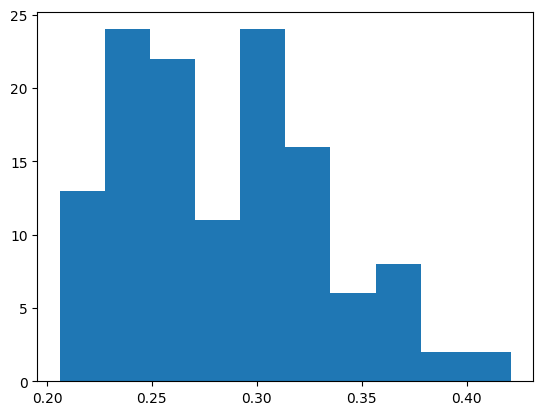

In [39]:
import matplotlib.pyplot as plt

plt.hist(df_got_correct['max_prob']);